In [5]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
# Define the three-qubit bit-flip code circuit
def bit_flip_code():
    # Create a quantum circuit with 3 qubits and 3 classical bits
    qc = QuantumCircuit(3, 3)
    # Step 1: Encoding (using 3 qubits to protect 1 logical qubit)
    qc.h(0) # Apply Hadamard gate to qubit 0 (superposition)
    qc.cx(0, 1) # Apply CNOT gate between qubit 0 and qubit 1
    qc.cx(0, 2) # Apply CNOT gate between qubit 0 and qubit 2
    # Step 2: Simulate an error (bit-flip error on qubit 1)
    qc.x(1) # Apply X gate (bit-flip) to qubit 1
    # Step 3: Error correction
    qc.cx(0, 1) # Apply CNOT gate between qubit 0 and qubit 1
    qc.cx(0, 2) # Apply CNOT gate between qubit 0 and qubit 2
    qc.ccx(2, 1, 0) # Apply Toffoli gate to perform majority vote (error correction)
    # Step 4: Measurement
    qc.measure([0, 1, 2], [0, 1, 2]) # Measure all qubits and store the result in classical bits
    return qc
# Simulate the circuit and plot the results
def simulate_circuit(circuit):
    # Use the Aer simulator
    simulator = Aer.get_backend('qasm_simulator')
    # Transpile the circuit for the simulator
    transpiled_circuit = transpile(circuit, simulator)
    # Assemble the transpiled circuit for the simulator
    qobj = assemble(transpiled_circuit)
    # Execute the circuit on the simulator
    result = simulator.run(qobj).result()
    # Get the counts of the measurement outcomes
    counts = result.get_counts(transpiled_circuit)
    return counts
if __name__ == "__main__":
    # Create and run the circuit
    circuit = bit_flip_code()
    counts = simulate_circuit(circuit)
    # Plot the measurement outcomes
    print("Measurement outcomes:")
    print(counts)

Measurement outcomes:
{'011': 512, '010': 512}


C:\Users\EARENDEL ICARUS\AppData\Local\Temp\ipykernel_11012\436013491.py:29: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj).result()


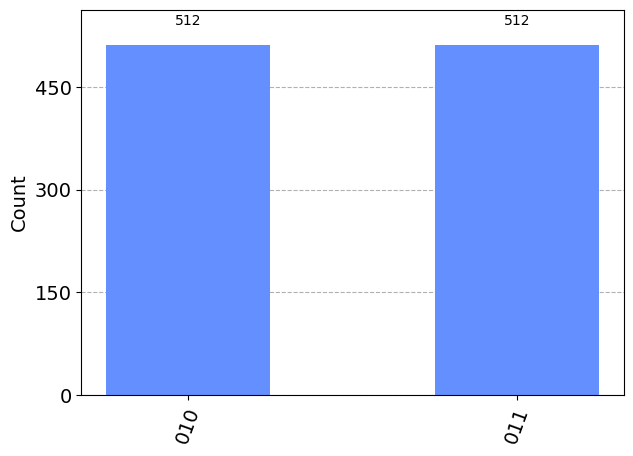

In [6]:
 plot_histogram(counts)